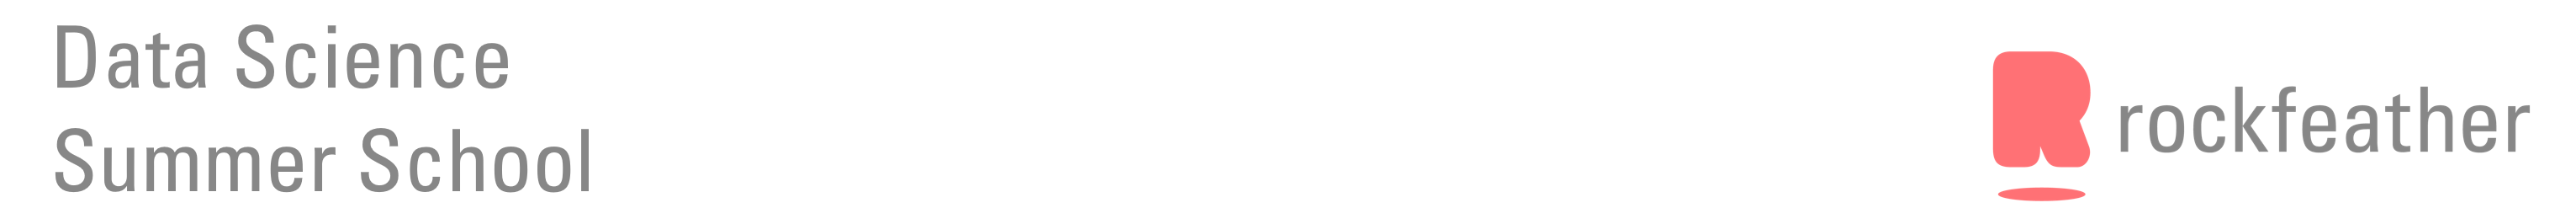

# Week 2 part 1: Machine Learning by Hand

Outline:

1. EDA
2. Baseline model
3. ML from scratch
    - single-feature prediction
    - multiple-feature prediction
    - data engineering
    - normalisation
    - how to use

In [1]:
# import necessary package
import pandas as pd

# read data into memory
df = pd.read_csv("housing_clean.csv")
# https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

# view header of data
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,...,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,...,548,TA,0,61,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,...,460,TA,298,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,...,608,TA,0,42,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,...,642,TA,0,35,272,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,...,836,TA,192,84,0,12,2008,WD,Normal,250000


In [2]:
# view all columns


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

# 1. Exploratory Data Analysis (EDA)

We separate our categorical and numeric variables.

In [3]:
nums = []
categories = []
for col, dtype in zip(df.columns, df.dtypes):
    if dtype == "object":
        categories.append(col)
    else:
        nums.append(col)

For our categorical, we can inspect, for example, the mean selling price per category.

In [4]:
for cat in categories:
    print(df.groupby(cat)['SalePrice'].mean().sort_values())
    print()

MSZoning
C (all)     74528.000000
RM         126316.830275
RH         131558.375000
RL         191004.994787
FV         214014.061538
Name: SalePrice, dtype: float64

LotShape
Reg    164754.818378
IR1    206101.665289
IR3    216036.500000
IR2    239833.365854
Name: SalePrice, dtype: float64

LandContour
Bnk    143104.079365
Lvl    180183.746758
Low    203661.111111
HLS    231533.940000
Name: SalePrice, dtype: float64

LotConfig
Inside     176938.047529
FR2        177934.574468
Corner     181623.425856
FR3        208475.000000
CulDSac    223854.617021
Name: SalePrice, dtype: float64

Neighborhood
MeadowV     98576.470588
IDOTRR     100123.783784
BrDale     104493.750000
BrkSide    124834.051724
Edwards    128219.700000
OldTown    128225.300885
Sawyer     136793.135135
Blueste    137500.000000
SWISU      142591.360000
NPkVill    142694.444444
NAmes      145847.080000
Mitchel    156270.122449
SawyerW    186555.796610
NWAmes     189050.068493
Gilbert    192854.506329
Blmngtn    194870.8823

For numeric, we can look at the correlation between different variables. To be able to visualise our data, we make use the `matplotlib` and `seaborn` packages.

*Can we quantify how strong the relationship between two numeric features is?*

**Correlation** describes the degree to which two variables move in coordination with one another.
- we get a number between -1 and 1.
    - -1 = perfect negative linear relationship
    -  1 = perfect positive linear relationship
    -  0 = no relationship

What is the relationship between the *Year Built* and the *Sale Price*?

In [5]:
df['...'].corr(df['...'])

0.5228973328794971

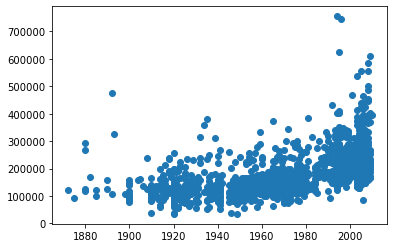

In [6]:
import matplotlib.pyplot as plt
import seaborn as sn

plt.scatter(df['...'], df['...'])

Let's draw a line of straight line to represent the relationship.

Text(0.5, 1.0, 'line of best fit')

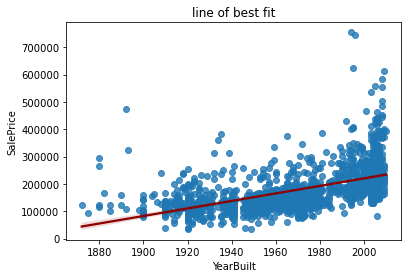

In [7]:
sn.regplot(x=df['...'], y=df['...'],line_kws={"color": "darkred"})
plt.title("line of best fit")

The newer the house, the higher the price, which makes sense.

We can do this for the whole dataframe at once.

In [8]:
# find correlation coefficient for all numeric columns


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,-0.065649,...,-0.045569,0.098664,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.013585,-0.021407,-0.084284
LotFrontage,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,0.043340,...,0.235755,0.038586,0.269729,0.323663,0.077106,0.137454,0.009790,0.010158,0.006768,0.334901
LotArea,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,0.111170,...,0.271364,-0.042198,0.154871,0.180403,0.171698,0.084774,-0.018340,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,-0.059119,...,0.396765,0.437998,0.600671,0.562022,0.238923,0.308819,-0.113937,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,0.040229,...,-0.023820,-0.299203,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,-0.049107,...,0.147716,0.700098,0.537850,0.478954,0.224880,0.188686,-0.387268,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,-0.067759,...,0.112581,0.571369,0.420622,0.371600,0.205726,0.226298,-0.193919,0.021490,0.035743,0.507101
MasVnrArea,0.022895,0.179283,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,-0.072302,...,0.247906,0.212168,0.363778,0.372567,0.159349,0.124965,-0.109849,-0.005940,-0.008184,0.475241
BsmtFinSF1,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,-0.050117,...,0.260011,0.119267,0.224054,0.296970,0.204306,0.111761,-0.102303,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.043340,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072302,-0.050117,1.000000,...,0.046921,-0.094208,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.015211,0.031706,-0.011378


To be able to better understand this, we visualize it for ourselves.

<AxesSubplot:>

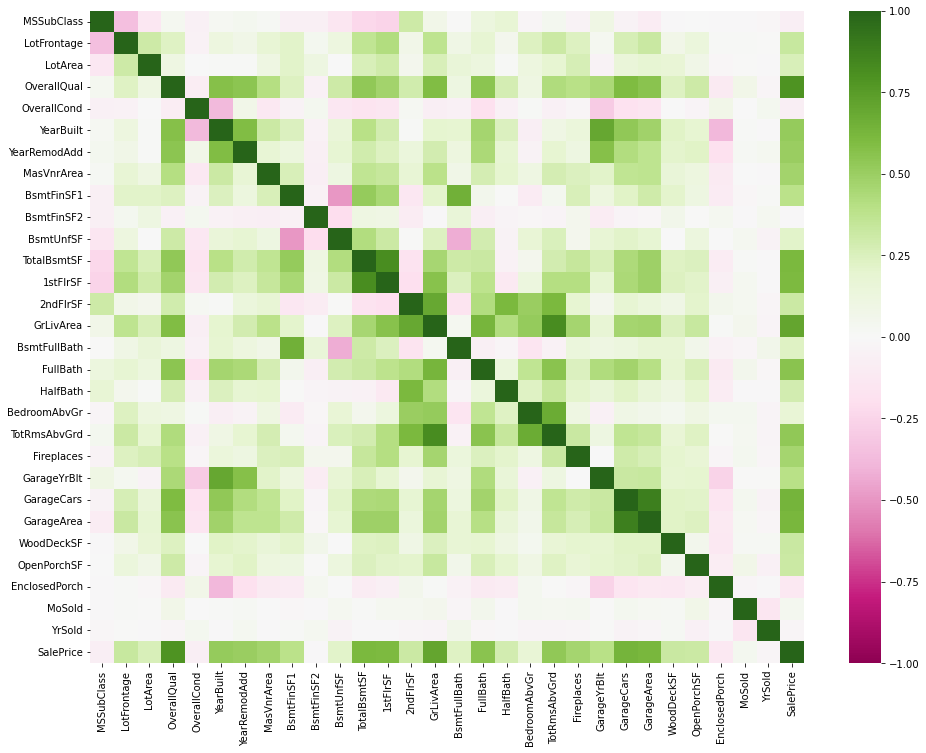

In [9]:
plt.figure(figsize=(16,12))

corr_mat = ... # set carr_mat as correlation matrix

sn.heatmap(corr_mat, cmap='PiYG', vmin=-1, vmax=1)

# 2. Baseline Model

For mathematical operations, we will need the `numpy` package. 

In [10]:
import numpy as np

In [11]:
def RMSE(y, y_hat):
    return np.sqrt(np.mean(np.square(y - y_hat)))

def MAPE(y, y_hat):
    return np.mean(np.abs(y-y_hat)/y)

In [12]:
# find the average of the SalePrice

180921.19589041095

In [13]:
# mean prediction

y = df['SalePrice'].to_numpy()
y_hat = np.full(df.shape[0], df['SalePrice'].mean())
print(f"Baseline RMSE: {RMSE(y, y_hat)}")
print(f"Baseline MAPE: {MAPE(y, y_hat)}")

Baseline RMSE: 79415.29188606751
Baseline MAPE: 0.363222261212389


# 3. First ML model

Let's find a good explanatory variable in the dataset.

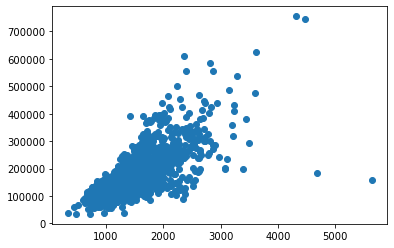

In [14]:
# create a scatter plot of the SalePrice and another (numeric) column

## Single-Feature Prediction

In [15]:
X = df['...'].to_numpy()
y = df['SalePrice'].to_numpy()

In [16]:
# weight and bias
w1 = 150
b = 0

In [17]:
def predict(x):
    return w1 * x + b

In [18]:
y_hat = predict(X[0]) # y_hat = prediction
err = y_hat - y[0] # err = error
print(f"y (actual): {y[0]}, y_hat (our prediction): {y_hat}, err (error): {err}")

y (actual): 208500, y_hat (our prediction): 256500, err (error): 48000


In [19]:
X

array([1710, 1262, 1786, ..., 2340, 1078, 1256], dtype=int64)

In [20]:
X[0]

1710

In [21]:
learning_rate = 1e-7 #  = 0.0000001

In [22]:
# adjust our weight and bias
b -= learning_rate * 1 * err
w1 -= learning_rate * X[0] * err

We repeat this for every observation in the dataset using a **for loop**.

In [23]:
errs = []

for idx, x in enumerate(X):
    # make a prediction
    y_hat = predict(x)

    # store the error (prediction - actual)
    err = y_hat - y[idx]
    
    # adjust our weight and bias
    b -= learning_rate * 1 * err
    w1 -= learning_rate * x * err
    
    # store the error
    errs.append(err)

    #repeat

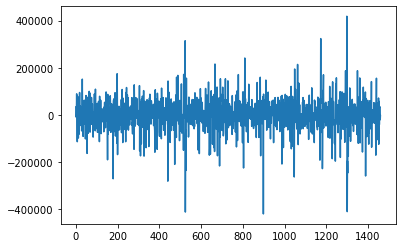

In [24]:
plt.plot(errs)

In order for this simple algorithm to lear, we want to run it through the dataset multiple times. Each time we run this through the dataset is what we call one **epoch**. We can set the number of epochs to whatever number we want.

In [25]:
import numpy as np

In [26]:
# define our one feature and label
X = df['...'].to_numpy() # choose single explanatory feature
y = df['SalePrice'].to_numpy()

# initial weight and bias
w1 = ... # choose weight 1
b = ... # choose bias

# set learning_rate
learning_rate = ... # choose a learning rate

# prediction function
def predict(x):
    return w1 * x + b

# create variables to store all parameters
all_errs = []
mean_abs_errs = []
errs = []
ws = []
bs = []

# define number of epochs
epoch_n = 20

# run learning algorithm for the specificed number of epochs.
for epoch in range(epoch_n):
    errs = []
    for idx, x in enumerate(X):
        y_hat = predict(x)
        err = y_hat - y[idx]

        # adjust
        b -= learning_rate * 1 * err
        w1 -= learning_rate * x * err
        
        # store parameters
        bs.append(b)
        ws.append(w1)
        errs.append(err)
    
    # print out status
    print(f"RMSE for epoch {epoch + 1}: {np.sqrt(np.mean(np.square(np.array(errs))))}")
    all_errs.append(errs)
    
all_errs = np.array(all_errs)

RMSE for epoch 1: 65725.5888200026
RMSE for epoch 2: 65696.9054101939
RMSE for epoch 3: 65696.89157809404
RMSE for epoch 4: 65696.87774632193
RMSE for epoch 5: 65696.86391487757
RMSE for epoch 6: 65696.85008376095
RMSE for epoch 7: 65696.83625297205
RMSE for epoch 8: 65696.82242251086
RMSE for epoch 9: 65696.80859237739
RMSE for epoch 10: 65696.7947625716
RMSE for epoch 11: 65696.78093309353
RMSE for epoch 12: 65696.76710394314
RMSE for epoch 13: 65696.75327512041
RMSE for epoch 14: 65696.73944662536
RMSE for epoch 15: 65696.72561845796
RMSE for epoch 16: 65696.71179061821
RMSE for epoch 17: 65696.6979631061
RMSE for epoch 18: 65696.68413592163
RMSE for epoch 19: 65696.67030906478
RMSE for epoch 20: 65696.65648253555


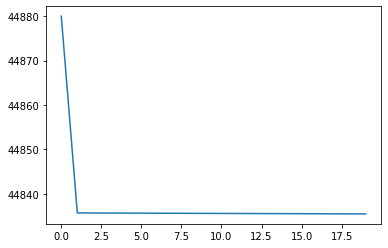

In [27]:
plt.plot(np.abs(all_errs).mean(axis=1))

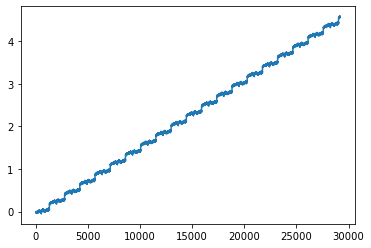

In [28]:
plt.plot(bs)

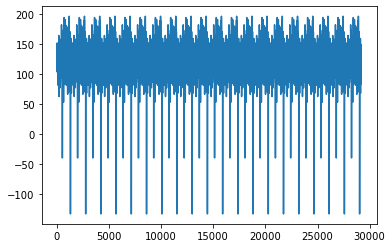

In [29]:
plt.plot(ws)

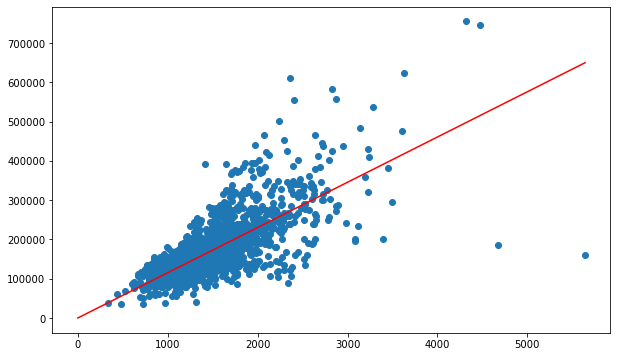

In [30]:
plt.figure(figsize=(10,6))
plt.scatter(X, y)
plt.plot([0, max(X)], [b, b + w1*max(X)], color='red')

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

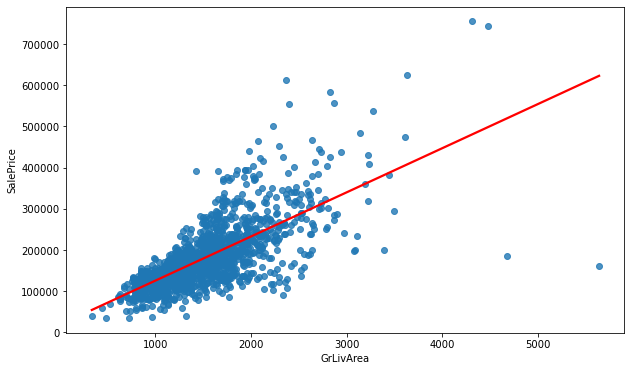

In [31]:
plt.figure(figsize=(10,6))

sn.regplot(x=df['...'], y=df['SalePrice'],line_kws={"color": "red"},ci=False)

We can set the `learning_rate` and `epoch_n` to different values and see how the algorithm learns.

## 1000 Epochs

In [32]:
X = df['...'].to_numpy()
y = df['SalePrice'].to_numpy()

# init weight and bias
w1 = 150
b = 0

# set learning_rate
learning_rate = 1e-12

# prediction function 
def predict(x):
    return w1 * x + b
    
all_errs = []
mean_abs_errs = []
errs = []
ws = []
bs = []
epoch_n = 1000

for epoch in range(epoch_n):
    errs = []
    for idx, x in enumerate(X):
        y_hat = predict(x)
        err = y_hat - y[idx]

        # adjust
        b -= learning_rate * 1 * err
        w1 -= learning_rate * x * err
        
        bs.append(b)
        ws.append(w1)
        errs.append(err)
    
    print(f"RMSE for epoch {epoch + 1}: {np.sqrt(np.mean(np.square(np.array(errs))))}")
    all_errs.append(errs)

    mean_abs_err = np.mean(np.abs(errs))

    mean_abs_errs.append(mean_abs_err)
all_errs = np.array(all_errs)

RMSE for epoch 1: 76091.94568335671
RMSE for epoch 2: 75963.32301785272
RMSE for epoch 3: 75835.44726565166
RMSE for epoch 4: 75708.31497689286
RMSE for epoch 5: 75581.92271072879
RMSE for epoch 6: 75456.2670353348
RMSE for epoch 7: 75331.34452791646
RMSE for epoch 8: 75207.15177471723
RMSE for epoch 9: 75083.68537102726
RMSE for epoch 10: 74960.94192119237
RMSE for epoch 11: 74838.91803862134
RMSE for epoch 12: 74717.61034579597
RMSE for epoch 13: 74597.01547428017
RMSE for epoch 14: 74477.13006472746
RMSE for epoch 15: 74357.95076689249
RMSE for epoch 16: 74239.47423963985
RMSE for epoch 17: 74121.69715095445
RMSE for epoch 18: 74004.61617794978
RMSE for epoch 19: 73888.22800687878
RMSE for epoch 20: 73772.52933314473
RMSE for epoch 21: 73657.5168613111
RMSE for epoch 22: 73543.1873051111
RMSE for epoch 23: 73429.5373874593
RMSE for epoch 24: 73316.56384046133
RMSE for epoch 25: 73204.26340542539
RMSE for epoch 26: 73092.63283287319
RMSE for epoch 27: 72981.66888254901
RMSE for epoch

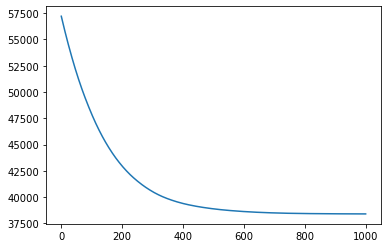

In [33]:
plt.plot(np.abs(all_errs).mean(axis=1))

## Multiple-Feature Prediction

Sale price is not determined only by the ground floor living area. We can add other features to learn from.

In [34]:
X1 = df['GrLivArea'].to_numpy()
X2 = df['TotalBsmtSF'].to_numpy()
X3 = df['2ndFlrSF'].to_numpy()
y = df['SalePrice'].to_numpy()

w1 = 150
w2 = 150
w3 = 150
b = 0

def predict(x1, x2, x3):
    return w1*x1 + w2*x2 + w3*x3 + b 
    
# set learning_rate
learning_rate = 1e-10

all_errs = []
mean_abs_errs = []
errs = []
w1s = []
w2s = []
w3s = []
bs = []
epoch_n = 1000

for epoch in range(epoch_n):
    errs = []
    for idx in range(len(X1)):

        x1 = X1[idx]
        x2 = X2[idx]
        x3 = X3[idx]
        y_hat = predict(x1, x2, x3)
        err = y_hat - y[idx]

        # adjust
        b -= learning_rate * 1 * err
        w1 -= learning_rate * x1 * err
        w2 -= learning_rate * x2 * err
        w3 -= learning_rate * x3 * err

        bs.append(b)
        w1s.append(w1)
        w2s.append(w2)
        w3s.append(w3)
        errs.append(err)
    
    print(f"RMSE for epoch {epoch + 1}: {np.sqrt(np.mean(np.square(np.array(errs))))}")
    all_errs.append(errs)

    mean_abs_err = np.mean(np.abs(errs))

    mean_abs_errs.append(mean_abs_err)
all_errs = np.array(all_errs)

RMSE for epoch 1: 220330.41708362108
RMSE for epoch 2: 134043.7298154531
RMSE for epoch 3: 90567.26360445099
RMSE for epoch 4: 71104.58319076286
RMSE for epoch 5: 63354.93190706089
RMSE for epoch 6: 60346.681389132245
RMSE for epoch 7: 59025.76804565274
RMSE for epoch 8: 58279.08103257426
RMSE for epoch 9: 57734.51222152893
RMSE for epoch 10: 57271.69771143861
RMSE for epoch 11: 56851.92807887273
RMSE for epoch 12: 56462.39864047377
RMSE for epoch 13: 56098.37814500355
RMSE for epoch 14: 55757.600463281924
RMSE for epoch 15: 55438.53844056813
RMSE for epoch 16: 55139.892353937896
RMSE for epoch 17: 54860.44930816621
RMSE for epoch 18: 54599.050788711706
RMSE for epoch 19: 54354.588707823736
RMSE for epoch 20: 54126.007056622155
RMSE for epoch 21: 53912.30334725802
RMSE for epoch 22: 53712.528851268595
RMSE for epoch 23: 53525.78781416544
RMSE for epoch 24: 53351.23599058705
RMSE for epoch 25: 53188.07877612203
RMSE for epoch 26: 53035.56912097225
RMSE for epoch 27: 52893.00534186163
RM

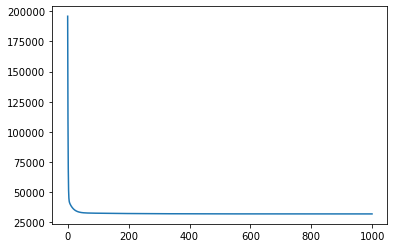

In [35]:
plt.plot(np.abs(all_errs).mean(axis=1))

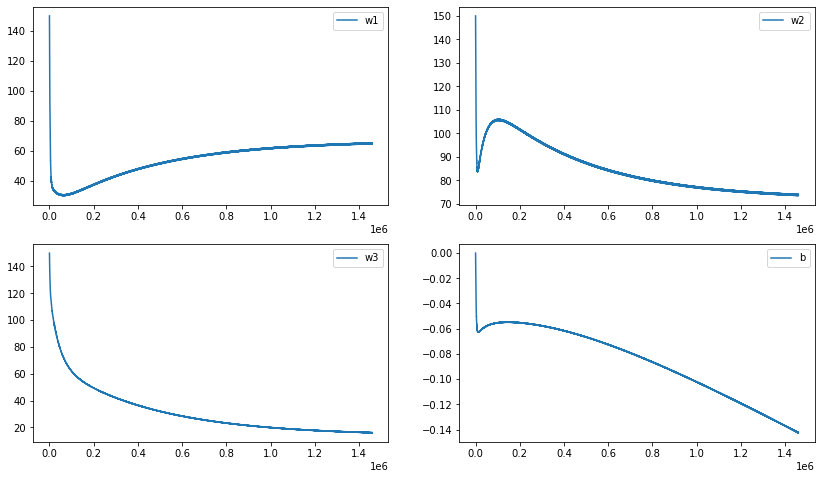

In [36]:
# Plot parameters
fig, axs = plt.subplots(2,2, figsize=(14,8))
params = [w1s,w2s,w3s,bs]
param_names = ['w1','w2','w3','b']
for i, ax in enumerate(axs.flatten()):

    ax.plot(params[i], label=f'{param_names[i]}')
    ax.legend()

# Data Engineering

In [37]:
X = df['GrLivArea'].to_numpy()
y = df['SalePrice'].to_numpy()

In [38]:
def normalize(arr):
    return (arr - min(arr)) / (max(arr) - min(arr))

In [39]:
X = normalize(X)
y = normalize(y)

In [40]:
# init weight and bias
w1 = np.random.random()
b = np.random.random()

# set learning_rate
learning_rate = 1e-4

all_errs = []
errs = []
ws = []
bs = []
epoch_n = 1000

def predict(x):
    return w1*x + b

for epoch in range(epoch_n):
    errs = []
    for idx, x in enumerate(X):
        y_hat = predict(x)
        err = y_hat - y[idx]

        # adjust
        b -= learning_rate * 1 * err
        w1 -= learning_rate * x * err
        
        bs.append(b)
        ws.append(w1)
        errs.append(err)
    
    print(f"RMSE for epoch {epoch + 1}: {np.sqrt(np.mean(np.square(np.array(errs))))}")
    all_errs.append(errs)

all_errs = np.array(all_errs)

RMSE for epoch 1: 0.614058357462258
RMSE for epoch 2: 0.52831806941993
RMSE for epoch 3: 0.4550164891264013
RMSE for epoch 4: 0.39242383482242693
RMSE for epoch 5: 0.339060585205927
RMSE for epoch 6: 0.29366164865409183
RMSE for epoch 7: 0.2551451487226303
RMSE for epoch 8: 0.22258497108164296
RMSE for epoch 9: 0.19518633944453725
RMSE for epoch 10: 0.17226386519048037
RMSE for epoch 11: 0.15322178326035127
RMSE for epoch 12: 0.13753645147896923
RMSE for epoch 13: 0.1247415813139657
RMSE for epoch 14: 0.11441691047557866
RMSE for epoch 15: 0.10618089909175428
RMSE for epoch 16: 0.09968743164903562
RMSE for epoch 17: 0.09462563338329087
RMSE for epoch 18: 0.09072121667906577
RMSE for epoch 19: 0.08773766076625349
RMSE for epoch 20: 0.08547602997898796
RMSE for epoch 21: 0.08377302284522066
RMSE for epoch 22: 0.08249751422638914
RMSE for epoch 23: 0.08154619327425441
RMSE for epoch 24: 0.08083892897044201
RMSE for epoch 25: 0.08031434589238898
RMSE for epoch 26: 0.07992589615265121
RMSE 

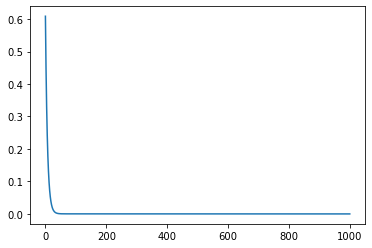

In [41]:
plt.plot(all_errs.mean(axis=1))

# Visualize model

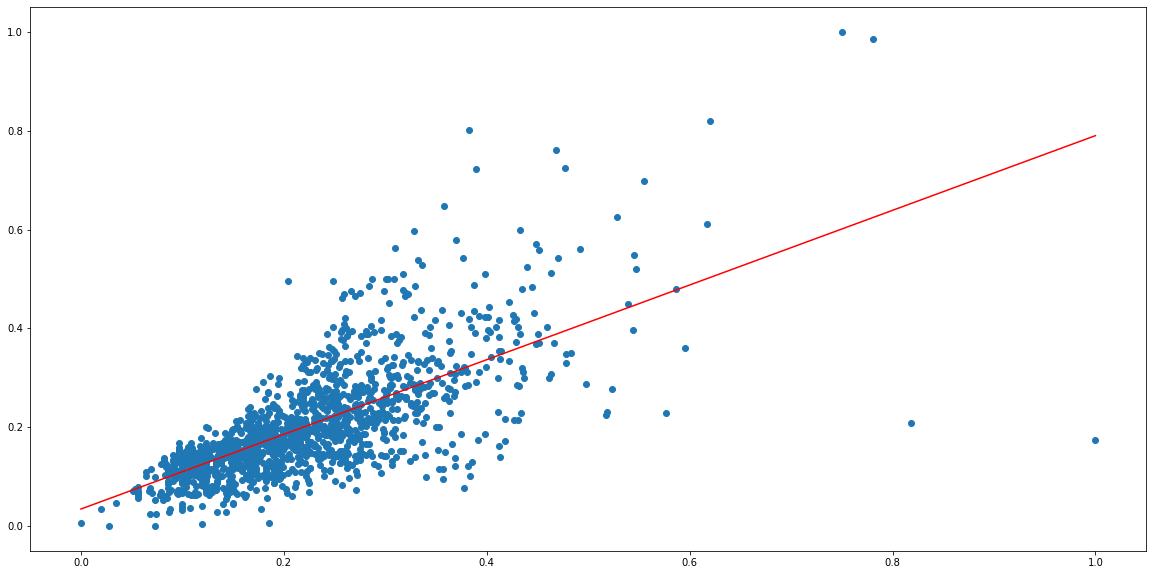

In [42]:
plt.figure(figsize=(20,10))
plt.scatter(X, y)
plt.plot([0, 1], [b, b + w1], color='red')

# How to use this model?
Note that w and b combined are the model here

## Same steps:
1. Load data
2. Normalize data
3. Predict
4. Denormalize prediction

In [43]:
X = df['GrLivArea'].to_numpy()
y = df['SalePrice'].to_numpy()

In [44]:
def normalize(arr):
    shift = min(arr)
    data_range = max(arr) - min(arr)
    return (arr - shift) / data_range, shift, data_range

In [45]:
def denormalize(arr, shift, data_range):
    return (arr * data_range) + shift

In [46]:
X, X_shift, X_range = normalize(X)
y, y_shift, y_range = normalize(y)

In [47]:
preds = []

for x in X:
    y_hat = w1 * x + b
    y_hat_denorm = denormalize(y_hat, y_shift, y_range)
    preds.append(y_hat_denorm)

In [48]:
preds[:10]

[200809.57834953695,
 154889.46593958524,
 208599.59741908236,
 201527.08010594244,
 250829.70079609152,
 165139.4910310923,
 199169.57433489582,
 239759.67369726388,
 207369.5944081015,
 135926.91952029715]

In [49]:
RMSE(preds, df['SalePrice'].to_numpy())

56087.088185659086

In [50]:
MAPE(preds, df['SalePrice'].to_numpy())

0.19635246575316995